# Titanic Project

## History

#### Import packages

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import csv

In [30]:
train = pd.read_csv('train.csv', sep=',')
test = pd.read_csv('test.csv', sep=',')

#### Data cleaning

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
train.duplicated().value_counts()

False    891
Name: count, dtype: int64

In [33]:
cat_col = []
num_col = []

for col in train.columns:
    if train[col].dtype == 'object':
        cat_col.append(col)
    else:
        num_col.append(col)

print('Categorical columns: ', cat_col)
print('Numerical columns: ', num_col)

Categorical columns:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [34]:
train[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [35]:
train['Ticket'].unique()[:100]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [36]:
train = train.drop(columns=['Name', 'Ticket'])
train.shape

(891, 10)

#### tratamento de dados faltantes

In [37]:
print('Percentual (%) de valores ausentes em cada coluna')

print(pd.DataFrame({'Counts': train.count(), 'Counts unique': train.nunique(),'Counts NA': train.isnull().sum(),'Percentages (%) NA':  round(train.isnull().sum()/train.shape[0]*100,2)}))

Percentual (%) de valores ausentes em cada coluna
             Counts  Counts unique  Counts NA  Percentages (%) NA
PassengerId     891            891          0                0.00
Survived        891              2          0                0.00
Pclass          891              3          0                0.00
Sex             891              2          0                0.00
Age             714             88        177               19.87
SibSp           891              7          0                0.00
Parch           891              7          0                0.00
Fare            891            248          0                0.00
Cabin           204            147        687               77.10
Embarked        889              3          2                0.22


In [ ]:
train

In [38]:
## valores NA

train = train.fillna(train['Age'].mean())

In [39]:

train['faixa_age'] =  pd.cut(train['Age'], bins=[0, 18, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], right=False)

In [40]:
one_hot_encoded_data = pd.get_dummies(train, columns = ['Sex'], dtype='int') 
one_hot_encoded_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,faixa_age,Sex_female,Sex_male
0,1,0,3,22.000000,1,0,7.2500,29.699118,S,3,0,1
1,2,1,1,38.000000,1,0,71.2833,C85,C,4,1,0
2,3,1,3,26.000000,0,0,7.9250,29.699118,S,3,1,0
3,4,1,1,35.000000,1,0,53.1000,C123,S,4,1,0
4,5,0,3,35.000000,0,0,8.0500,29.699118,S,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,29.699118,S,3,0,1
887,888,1,1,19.000000,0,0,30.0000,B42,S,2,1,0
888,889,0,3,29.699118,1,2,23.4500,29.699118,S,3,1,0
889,890,1,1,26.000000,0,0,30.0000,C148,C,3,0,1


In [ ]:
test = test.fillna(test['Age'].mean())
one_hot_encoded_data_test = pd.get_dummies(test, columns = ['Sex'], dtype='int') 
one_hot_encoded_data_test['faixa_age'] =  pd.cut(test['Age'], bins=[0, 18, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], right=False)
one_hot_encoded_data_test

In [ ]:
one_hot_encoded_data_test = one_hot_encoded_data_test[['Sex_female', 'Sex_male', 'Pclass', 'Age', 'faixa_age', 'Fare']]
one_hot_encoded_data_test

In [ ]:
one_hot_encoded_data_test.isnull().sum()

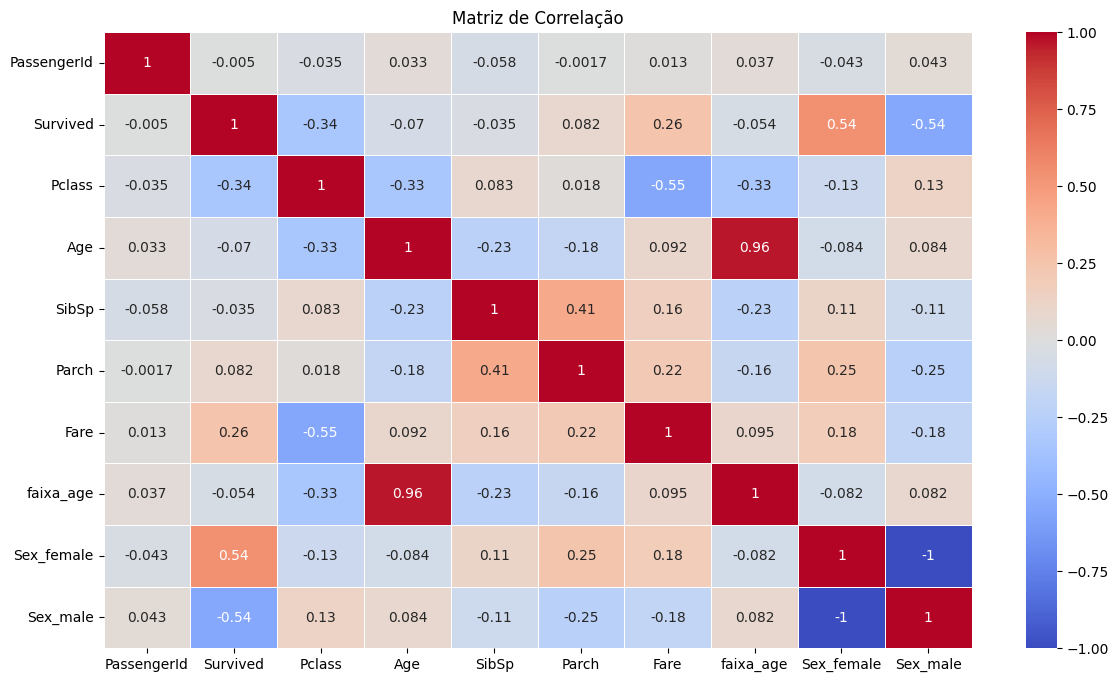

In [41]:
matrix_corr = one_hot_encoded_data.drop(columns=['Cabin', 'Embarked']).corr()

plt.figure(figsize=(14, 8))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

In [42]:
X = one_hot_encoded_data[['Sex_female', 'Sex_male', 'Pclass', 'Age', 'faixa_age', 'Fare']]
y = one_hot_encoded_data.Survived

In [65]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.5, random_state=1)

In [66]:
mod = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=1)
mod.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=1)

In [71]:
X_prev = mod.predict(X_valid)
X_prev, X_prev.shape

(array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 

In [69]:
np.mean(y_valid == X_prev)

0.7869955156950673

In [63]:
with open('gender_submission1.csv', 'w', newline='') as prediction:
    fields = ['PassengerId', 'Survived']
    prediction_writer = csv.DictWriter(prediction, fieldnames=fields)
    prediction_writer.writeheader()
    for passenger_id, survived in pd.Series(X_prev, index=test['PassengerId']).items():
        prediction_writer.writerow({'PassengerId': passenger_id, 'Survived': survived})
